In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Importing hierarchical clustering libraries

In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
from sklearn.datasets import load_iris
data=load_iris(as_frame=True).frame

In [4]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


x=sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)	
y = target 

# Normalization fnction 
using sklearn library norm

In [5]:
def norm_func(i):
  x=(i-i.max())/(i.max()-i.min())
  return x

In [6]:
df_norm=norm_func(data.iloc[:,:4])

In [7]:
df_norm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.777778,-0.375000,-0.932203,-0.958333
1,-0.833333,-0.583333,-0.932203,-0.958333
2,-0.888889,-0.500000,-0.949153,-0.958333
3,-0.916667,-0.541667,-0.915254,-0.958333
4,-0.805556,-0.333333,-0.932203,-0.958333
...,...,...,...,...
145,-0.333333,-0.583333,-0.288136,-0.083333
146,-0.444444,-0.791667,-0.322034,-0.250000
147,-0.388889,-0.583333,-0.288136,-0.208333
148,-0.472222,-0.416667,-0.254237,-0.083333


# Creating dendrogram

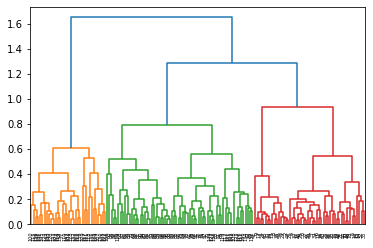

In [8]:
demdrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

# Creating clusters

In [9]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [10]:
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [11]:
y_hc=hc.fit_predict(df_norm)

In [12]:
y_hc

array([2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2,
       2, 3, 2, 3, 2, 2, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4, 4, 1, 4, 1, 4, 1,
       4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 4, 4, 4, 4, 1, 4, 1, 1, 4,
       4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 0, 1, 0, 0, 0, 0, 4, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 4, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [13]:
data['h_clusterid']=y_hc

In [14]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,h_clusterid
0,5.1,3.5,1.4,0.2,0,2
1,4.9,3.0,1.4,0.2,0,3
2,4.7,3.2,1.3,0.2,0,3
3,4.6,3.1,1.5,0.2,0,3
4,5.0,3.6,1.4,0.2,0,2


In [15]:
data1=data.sort_values("h_clusterid")


In [16]:
data1.iloc[:,[4,-1]]

,target,h_clusterid
116,2,0
102,2,0
125,2,0
124,2,0
77,1,0
...,...,...
96,1,4
98,1,4
99,1,4
119,2,4
